In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from noaa_sdk import NOAA
import datetime
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(21.7,15.27)}, font_scale=2)
plt.xkcd()

In [2]:
indict = {'St. Louis, MO':'63368', 
          'Charlotte, NC':'28277', 
          'Miami, FL':'33178', 
          'San Francisco, CA': '95111', 
          'Brownsville, TX':'78520',
          'New York City, NY': '10001'
          }

In [5]:
n = NOAA()
observations = {}

for i in indict:
    observations[i] = pd.DataFrame(list(n.get_observations(indict[i], 'US')))

In [6]:
def get_value(x):
    return x['value']

for i in indict:
    observations[i]['temperature_value'] = observations[i]['temperature'].apply(lambda x: get_value(x))
    observations[i]['temperature_value'] = observations[i]['temperature_value'] * 9/5 + 32

    observations[i]['timestamp'] = pd.to_datetime(observations[i]['timestamp'], infer_datetime_format=True)
    observations[i]['timestamp'] = pd.DatetimeIndex(observations[i]['timestamp']).tz_convert('US/Central')

In [8]:
d = str(observations['St. Louis, MO']['timestamp'][0])
today = d[0:10]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\saeed\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


C:\Users\saeed\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  func(*args, **kwargs)
C:\Users\saeed\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from current font.
  func(*args, **kwargs)
C:\Users\saeed\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\saeed\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


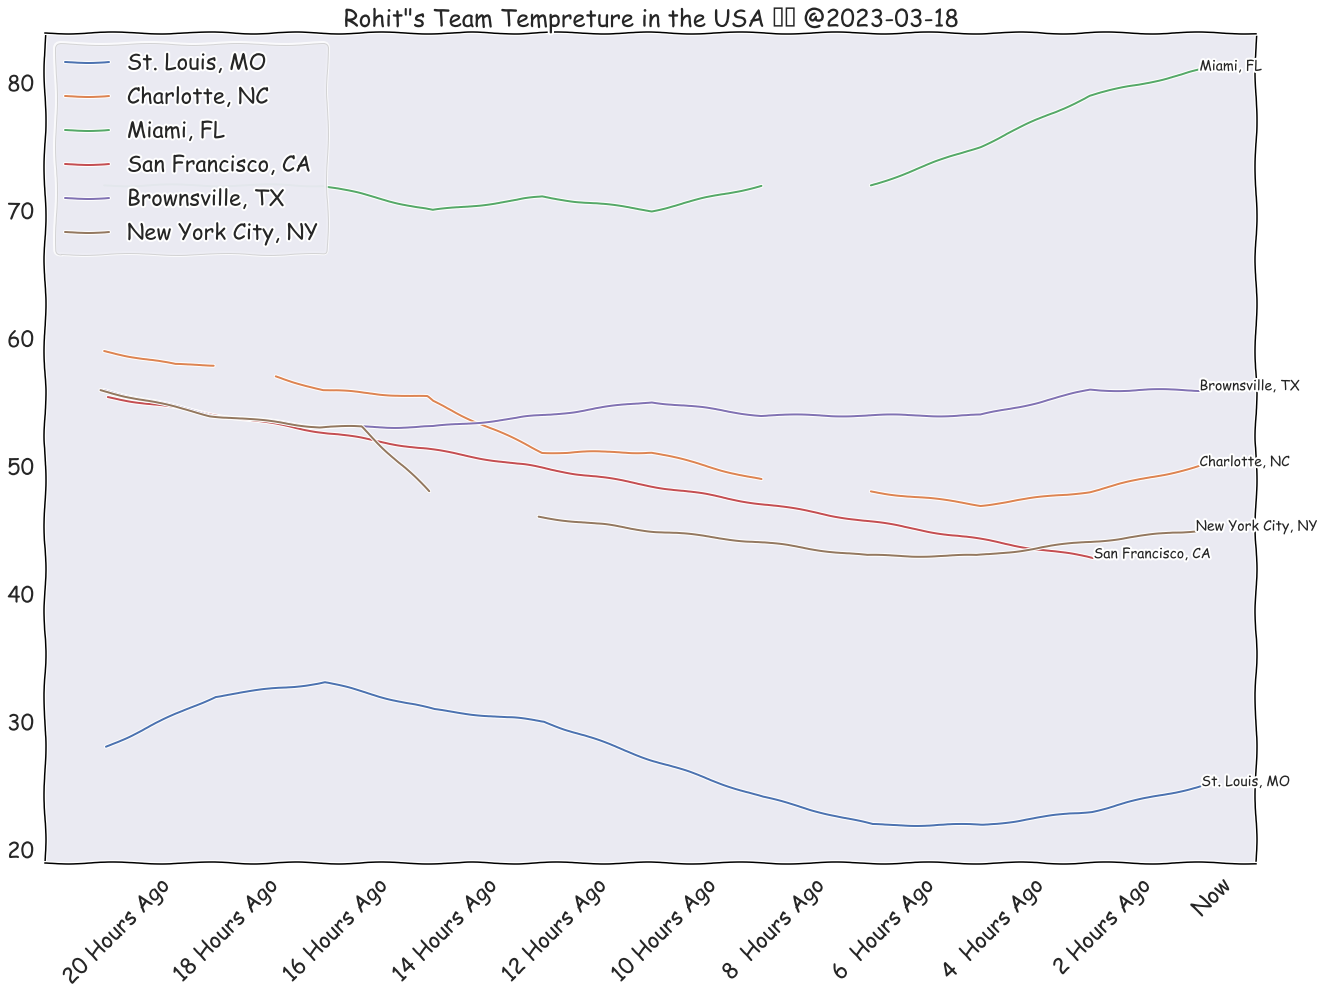

In [11]:
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

timewin = 10
for i in indict:
    ax= sns.lineplot(x='timestamp', y='temperature_value', data=observations[i][observations[i]['timestamp'] >= (observations[i]['timestamp'][0] - pd.DateOffset(hours=timewin))], label= i)
    plt.annotate(i, xy=(observations[i]['timestamp'][0], observations[i]['temperature_value'][0]))
    
import matplotlib.dates as mdates
xlabels = reversed(['Now','2 Hours Ago','4  Hours Ago','6  Hours Ago','8  Hours Ago','10 Hours Ago',
                    '12 Hours Ago','14 Hours Ago','16 Hours Ago','18 Hours Ago','20 Hours Ago'])
xlabels = [x for x in xlabels]


ax.set_xticklabels(xlabels, rotation=45);
# myFmt = mdates.DateFormatter('%A %H:%M')
# ax.xaxis.set_major_formatter(myFmt)
ax.set_title('Rohit"s Team Tempreture in the USA 🇺🇸 @' + today)
ax.set_xlabel('')
ax.set_ylabel('')

ax.legend(loc='upper left')